In [9]:
from model import GroceryModel
import networkx as nx
import matplotlib.pyplot as plt
import json

In [10]:
config = {
    "height": 10,
    "width": 10,
    "n_persons": 2,
    "n_items": 1,
    "grid_layout": "grids/simple_10x10.txt", 
    "avg_arrival": 10,
    "n_steps": 100
}

# with open('config1.json', 'w') as f:
#     json.dump(config, f)

In [11]:
model = GroceryModel(config)

In [12]:
model.run_model()

0 | arrival_times: [0, 8]
arriving!
Person 7 has objs ['chicken', 'exit']
Person 7 at (5, 9) has current obj chicken at (3, 1)
planned move: (4, 9)
1 | arrival_times: [0, 8]
Person 7 at (4, 9) has current obj chicken at (3, 1)
planned move: (5, 9)
2 | arrival_times: [0, 8]
Person 7 at (5, 9) has current obj chicken at (3, 1)
planned move: (6, 9)
3 | arrival_times: [0, 8]
Person 7 at (6, 9) has current obj chicken at (3, 1)
planned move: (7, 9)
4 | arrival_times: [0, 8]
Person 7 at (7, 9) has current obj chicken at (3, 1)
planned move: (6, 9)
5 | arrival_times: [0, 8]
Person 7 at (6, 9) has current obj chicken at (3, 1)
planned move: (6, 8)
6 | arrival_times: [0, 8]
Person 7 at (6, 8) has current obj chicken at (3, 1)
planned move: (6, 7)
illegal move, try again
Person 7 at (6, 8) has current obj chicken at (3, 1)
illegal move, try again
Person 7 at (6, 8) has current obj chicken at (3, 1)
7 | arrival_times: [0, 8]
Person 7 at (5, 8) has current obj chicken at (3, 1)
planned move: (6, 8

In [13]:
g = model.graph

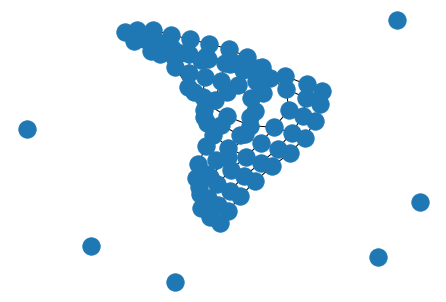

In [14]:
plt.figure()
nx.draw(g)

In [7]:
print(g.edges)

[((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 1), (0, 2)), ((0, 2), (1, 2)), ((0, 2), (0, 3)), ((0, 3), (1, 3)), ((0, 3), (0, 4)), ((0, 4), (1, 4)), ((0, 4), (0, 5)), ((0, 5), (1, 5)), ((0, 5), (0, 6)), ((0, 6), (1, 6)), ((0, 6), (0, 7)), ((0, 7), (1, 7)), ((0, 7), (0, 8)), ((0, 8), (1, 8)), ((0, 8), (0, 9)), ((0, 9), (1, 9)), ((1, 0), (2, 0)), ((1, 0), (1, 1)), ((1, 1), (2, 1)), ((1, 1), (1, 2)), ((1, 2), (2, 2)), ((1, 2), (1, 3)), ((1, 3), (2, 3)), ((1, 3), (1, 4)), ((1, 4), (2, 4)), ((1, 4), (1, 5)), ((1, 5), (2, 5)), ((1, 5), (1, 6)), ((1, 6), (2, 6)), ((1, 6), (1, 7)), ((1, 7), (2, 7)), ((1, 7), (1, 8)), ((1, 8), (2, 8)), ((1, 8), (1, 9)), ((1, 9), (2, 9)), ((2, 0), (3, 0)), ((2, 0), (2, 1)), ((2, 1), (3, 1)), ((2, 1), (2, 2)), ((2, 2), (3, 2)), ((2, 2), (2, 3)), ((2, 3), (3, 3)), ((2, 3), (2, 4)), ((2, 4), (3, 4)), ((2, 4), (2, 5)), ((2, 5), (3, 5)), ((2, 5), (2, 6)), ((2, 6), (3, 6)), ((2, 6), (2, 7)), ((2, 7), (2, 8)), ((2, 8), (3, 8)), ((2, 8), (2, 9)), ((2, 9), 